In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import random

In [2]:
def exprand(lambdr): # Função responsável por gerar os números aleatórios por ordem de chegada
    return -math.log(1.0 - random.random()) / lambdr

In [3]:
tempo_chegada = [exprand(0.2)*4 for _ in range(100)] # Gerados 100 números aleatórios
test = [exprand(0.2) for _ in range(50)] # 

In [4]:
step = 10
intervals = [[i, i+step] for i in range(0, 100, step)] # Gerados os intervalos

In [5]:
intervals

[[0, 10],
 [10, 20],
 [20, 30],
 [30, 40],
 [40, 50],
 [50, 60],
 [60, 70],
 [70, 80],
 [80, 90],
 [90, 100]]

In [6]:
data_intervals = [] # Valores separados por intervalos
for interval in intervals:
    data_intervals.append([x for x in tempo_chegada if x >= interval[0] and x <= interval[1]])
    
data_intervals[:1] # 10 valores de amostra

[[2.738259420143852,
  0.6096072938458271,
  3.3964669314199525,
  8.876970927824347,
  0.47921500189756416,
  8.009221499500946,
  1.0152162518008359,
  8.21308645587873,
  5.438278541167383,
  1.6144784501683225,
  5.844384642977392,
  1.6193639499187076,
  8.162823460256252,
  2.7401217003605387,
  2.047971160751047,
  5.38387982893459,
  5.7882538427449814,
  1.475608879168793,
  9.072152424026035,
  5.641431435589935,
  7.848961784406382,
  9.292192188960682,
  6.502137674997358,
  2.7077844221652585,
  2.8936377057620724,
  7.1722814592696436,
  2.5403361629904655,
  3.3634419752983855,
  5.240832499661943,
  2.314977492400185,
  1.395079993260582,
  2.4068226266150847,
  7.1274263892109895,
  8.3814318821325]]

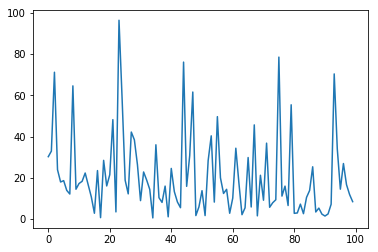

In [7]:
plt.plot(tempo_chegada) #Flutuação do tempo de chegada

In [8]:
count_data_intervals = [] 

for interval in data_intervals:
    count_data_intervals.append(len(interval))
    
print(count_data_intervals) # Conta dados por intervalo

[34, 31, 13, 8, 5, 2, 2, 4, 0, 1]


In [9]:
middle_data_intervals = []

for interval in intervals:
    middle_data_intervals.append(sum(interval)/2)

print(middle_data_intervals) # Valor médio de cada intervalo

[5.0, 15.0, 25.0, 35.0, 45.0, 55.0, 65.0, 75.0, 85.0, 95.0]


In [10]:
df = pd.DataFrame(data={"classes": intervals, "ponto_medio": middle_data_intervals, "observacoes": count_data_intervals})

In [11]:
df.head()

,classes,observacoes,ponto_medio
0,"[0, 10]",34,5.0
1,"[10, 20]",31,15.0
2,"[20, 30]",13,25.0
3,"[30, 40]",8,35.0
4,"[40, 50]",5,45.0


In [12]:
df['frequencia'] = df['observacoes']/100 # Gera a coluna de frequencia

In [13]:
df.head()

,classes,observacoes,ponto_medio,frequencia
0,"[0, 10]",34,5.0,0.34
1,"[10, 20]",31,15.0,0.31
2,"[20, 30]",13,25.0,0.13
3,"[30, 40]",8,35.0,0.08
4,"[40, 50]",5,45.0,0.05


In [14]:
df['frequencia_acumulada'] = [sum(df['frequencia'][0:i+1]) for i in range(len(df['frequencia']))]
# Gera a coluna de frequencia acumulada

In [15]:
df

,classes,observacoes,ponto_medio,frequencia,frequencia_acumulada
0,"[0, 10]",34,5.0,0.34,0.34
1,"[10, 20]",31,15.0,0.31,0.65
2,"[20, 30]",13,25.0,0.13,0.78
3,"[30, 40]",8,35.0,0.08,0.86
4,"[40, 50]",5,45.0,0.05,0.91
5,"[50, 60]",2,55.0,0.02,0.93
6,"[60, 70]",2,65.0,0.02,0.95
7,"[70, 80]",4,75.0,0.04,0.99
8,"[80, 90]",0,85.0,0.00,0.99
9,"[90, 100]",1,95.0,0.01,1.00


In [16]:
frequencia_intervalo = []
for i in range(len(df['frequencia_acumulada'])):
    if(i==0): 
        frequencia_intervalo.append([0, df['frequencia_acumulada'][i]])
    else: 
        frequencia_intervalo.append([df['frequencia_acumulada'][i-1], df['frequencia_acumulada'][i]])
    

In [17]:
frequencia_intervalo # Mostra o intervalo de frequencias

[[0, 0.34],
 [0.34, 0.65],
 [0.65, 0.78],
 [0.78, 0.86],
 [0.86, 0.91],
 [0.91, 0.93],
 [0.93, 0.9500000000000001],
 [0.9500000000000001, 0.9900000000000001],
 [0.9900000000000001, 0.9900000000000001],
 [0.9900000000000001, 1.0]]

In [18]:
df['frequencia_intervalo'] = frequencia_intervalo # Gera a coluna de intervalos de frequencia

In [19]:
df

,classes,observacoes,ponto_medio,frequencia,frequencia_acumulada,frequencia_intervalo
0,"[0, 10]",34,5.0,0.34,0.34,"[0, 0.34]"
1,"[10, 20]",31,15.0,0.31,0.65,"[0.34, 0.65]"
2,"[20, 30]",13,25.0,0.13,0.78,"[0.65, 0.78]"
3,"[30, 40]",8,35.0,0.08,0.86,"[0.78, 0.86]"
4,"[40, 50]",5,45.0,0.05,0.91,"[0.86, 0.91]"
5,"[50, 60]",2,55.0,0.02,0.93,"[0.91, 0.93]"
6,"[60, 70]",2,65.0,0.02,0.95,"[0.93, 0.9500000000000001]"
7,"[70, 80]",4,75.0,0.04,0.99,"[0.9500000000000001, 0.9900000000000001]"
8,"[80, 90]",0,85.0,0.00,0.99,"[0.9900000000000001, 0.9900000000000001]"
9,"[90, 100]",1,95.0,0.01,1.00,"[0.9900000000000001, 1.0]"


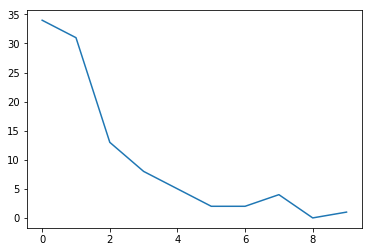

In [20]:
df['observacoes'].plot() # Plota o gráfico discretizados 

In [21]:
random_numbers = np.random.uniform(0, 1 , 100) 
# Gera 100 valores aleatórios entre 0 e 1

In [22]:
random_numbers[:10] # amostra de 10 números dos 100

array([0.06560008, 0.07313665, 0.84986041, 0.36147267, 0.00742887,
       0.092383  , 0.50742279, 0.11905503, 0.33919485, 0.99499858])

In [23]:
tec = [] # gera os tecs relacionados aos números aleatórios
for random_number in random_numbers:
    tec.append([df['ponto_medio'][i] for i in range(len(df['frequencia_intervalo'])) if random_number >= df['frequencia_intervalo'][i][0] and random_number <= df['frequencia_intervalo'][i][1]])
    

In [24]:
tec[:10] # 10 valores de amostra

[[5.0], [5.0], [35.0], [15.0], [5.0], [5.0], [15.0], [5.0], [5.0], [95.0]]

In [25]:
unique, counts = np.unique(tec, return_counts=True)
oc = list(zip(unique, counts)) # Conta os valores que apareceram decorrentes dos aleatórios

In [26]:
[unique, counts]

[array([ 5., 15., 25., 35., 45., 55., 65., 75., 95.]),
 array([38, 34, 11,  7,  1,  2,  2,  4,  1])]

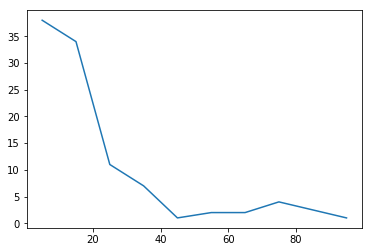

In [27]:
plt.plot(unique, counts) #plota o número de aparições de cada valor médio

In [28]:
df.to_csv('22-03-2018.csv') # Gera o arquivo csv com a tabela (para entrega)

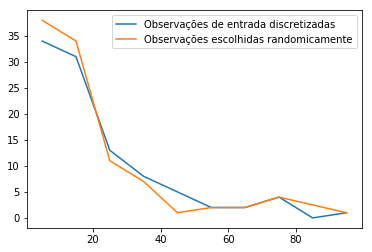

In [29]:
plt.plot(df['ponto_medio'], df['observacoes'], label="Observações de entrada discretizadas")
plt.plot(unique, counts, label="Observações escolhidas randomicamente")
plt.legend()

# Plota a diferença entre a distribuição discreta real (entrada) e a frequencia gerada
# pela aparição de 100 números